In [1]:
# 1. Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from tensorflow.python.keras.utils import np_utils

In [2]:
# 2. Load CIFAR dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val, y_val = X_train[40000:50000,:], y_train[40000:50000]
X_train, y_train = X_train[:40000,:], y_train[:40000]
print(X_train.shape)


(40000, 32, 32, 3)


In [3]:
# mean-std normalization for each channel
mean = np.mean(X_train,axis=(0,1,2))
std = np.std(X_train,axis=(0,1,2))
X_train = (X_train-mean)/(std+1e-7)
X_val = (X_val-mean)/(std+1e-7)

In [4]:
# 3. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [5]:
# 4. Build model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3))) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 2x2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 2x2
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [6]:
# 5. Compile model
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [7]:
# 6. Fit model
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=7, verbose=1)

Epoch 1/7
1250/1250 [==============================] - 109s 86ms/step - loss: 1.3786 - accuracy: 0.4943 - val_loss: 1.0510 - val_accuracy: 0.6326
Epoch 2/7
1250/1250 [==============================] - 113s 90ms/step - loss: 0.9135 - accuracy: 0.6775 - val_loss: 0.8843 - val_accuracy: 0.6874
Epoch 3/7
1250/1250 [==============================] - 125s 100ms/step - loss: 0.7347 - accuracy: 0.7441 - val_loss: 0.8094 - val_accuracy: 0.7176
Epoch 4/7
1250/1250 [==============================] - 125s 100ms/step - loss: 0.6013 - accuracy: 0.7905 - val_loss: 0.7770 - val_accuracy: 0.7377
Epoch 5/7
1250/1250 [==============================] - 127s 102ms/step - loss: 0.4932 - accuracy: 0.8262 - val_loss: 0.7665 - val_accuracy: 0.7440
Epoch 6/7
1250/1250 [==============================] - 129s 103ms/step - loss: 0.3983 - accuracy: 0.8617 - val_loss: 0.8413 - val_accuracy: 0.7474
Epoch 7/7
1250/1250 [==============================] - 126s 101ms/step - loss: 0.3213 - accuracy: 0.8867 - val_loss: 0.8

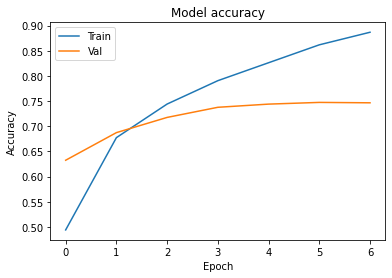

In [8]:
# 7. Plot accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

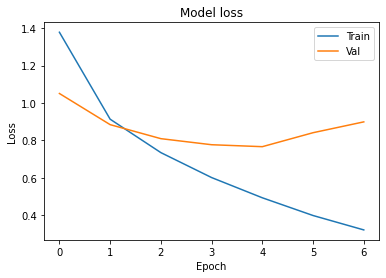

In [9]:
# 8. Plot loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [10]:
# 9. Evaluate model
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[79.21147155761719, 0.48829999566078186]


Predict:  horse


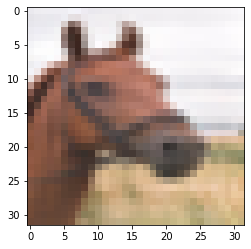

In [16]:
# 10. CIFAR10 prediction
index = 99
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
pred = model.predict(X_test, verbose=0)
pred = np.argmax(pred,axis = 1)
plt.imshow(X_test[index])
print('Predict: ' ,classes[pred[index]])

In [17]:
# 11. Save model
model.save('cifar10_cnn_adv3.h5')

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
